In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset/test.csv')

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
%timeit 
li = dataset.columns
for i in li:
    if(dataset[i].isnull().sum()>0):
        print(i + " "+ str(dataset[i].isnull().sum()))

MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


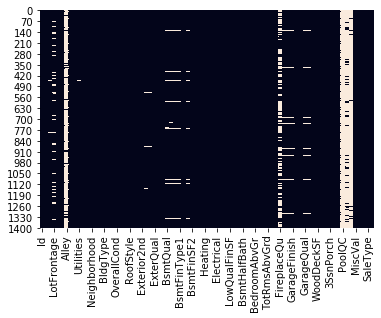

In [5]:
sns.heatmap(dataset.isnull(),cbar=False)

In [6]:
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())

In [7]:
dataset_copy = dataset
dataset.drop(['Alley','MiscFeature','Id'],axis = 1,inplace=True)
dataset.drop(['Fence','PoolQC'],axis = 1,inplace=True)
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(dataset['FireplaceQu'].mode()[0])
columnList = ['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','GarageCond', 'GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'Electrical', 'BsmtFinType2' ,'BsmtFinType1','TotalBsmtSF']
for i in columnList:
    dataset[i] = dataset[i].fillna(dataset[i].mode()[0])

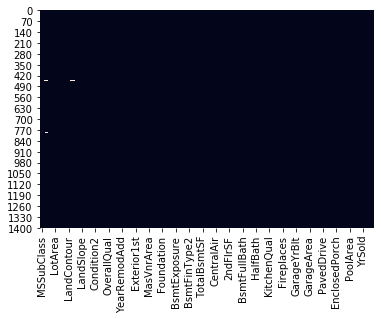

In [8]:
sns.heatmap(dataset.isnull(),cbar=False)

In [9]:
columnList = ['MSZoning','Utilities','Exterior1st','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'KitchenQual', 'Functional', 'GarageCars' ,'GarageArea','SaleType','Exterior2nd',]
for i in columnList:
    dataset[i] = dataset[i].fillna(dataset[i].mode()[0])

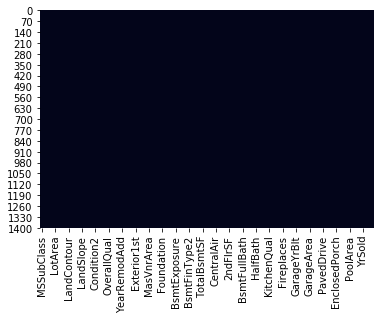

In [10]:
sns.heatmap(dataset.isnull(),cbar=False)

In [11]:
li = dataset.columns
for i in li:
    if(dataset[i].isnull().sum()>0):
        print(i + " "+ str(dataset[i].isnull().sum()))

In [12]:
dataset.shape

(1459, 75)

In [13]:
dataset.to_csv('trainset.csv',index=False)